In [1]:
# Import the random module.
import random

# Import the NumPy module.
import numpy as np

# Import timeit.
import timeit

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
random.randint(-90, 90)

55

In [3]:
random.random()

0.10208529635117203

In [4]:
random_number = random.randint(-90, 89) + random.random()
random_number

74.50220991303394

In [5]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1

In [6]:
latitudes

[-22.724699116320124,
 -0.7939814709599504,
 -37.20841162280208,
 34.89479311765116,
 -31.205922638462322,
 -86.92148779414549,
 84.69726780677335,
 14.198934671291084,
 -23.553439106658892,
 -9.557605903747584]

In [7]:
random.randrange(-90, 90, step=1)

-21

In [8]:
random.randrange(-90, 90, step=3)

-63

In [9]:
np.random.uniform(-90.000, 90.000)

-61.472650759486456

In [10]:
np.random.uniform(-90.000, 90.000, size=50)

array([ 48.67953934,   1.1283631 , -24.95848942,   6.12511991,
        81.81543203, -27.84446544,  88.28643752, -50.3657393 ,
        47.77495294, -73.2981049 ,  24.54882135,   1.42090793,
        87.17774517,  73.67312703, -76.9882252 , -56.78843415,
         3.35975465, -44.32677694,  13.10824114, -14.28307889,
        64.04281183, -78.35813337,  28.7713055 , -44.78581348,
         7.003128  ,  76.82683656,  86.08178471, -15.14838129,
       -64.33224614, -73.73150059,  89.90375923,  65.5900081 ,
        74.95180137,   8.54856941,  11.05916966, -57.40319433,
       -77.30586905,   4.02897869, -73.22288058,  82.48750793,
        63.94572   ,   2.49995782,  84.11592931,  82.2762653 ,
        80.87100032,  43.26647976,  54.83693275,  37.34399811,
       -86.04573255,  -8.0086987 ])

In [11]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

13.3 µs ± 273 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

1.63 ms ± 32.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [15]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [19]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e575b65f80f7c3b85f9d61d0d3852f3


In [21]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e575b65f80f7c3b85f9d61d0d3852f3&q=Boston


In [22]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [23]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [24]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [25]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":77.29,"feels_like":79.38,"temp_min":75,"temp_max":79,"pressure":1013,"humidity":83},"visibility":10000,"wind":{"speed":11.41,"deg":170},"clouds":{"all":90},"dt":1596416543,"sys":{"type":1,"id":3486,"country":"US","sunrise":1596361095,"sunset":1596412955},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [26]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 77.29,
  'feels_like': 79.38,
  'temp_min': 75,
  'temp_max': 79,
  'pressure': 1013,
  'humidity': 83},
 'visibility': 10000,
 'wind': {'speed': 11.41, 'deg': 170},
 'clouds': {'all': 90},
 'dt': 1596416543,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1596361095,
  'sunset': 1596412955},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [27]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [28]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [29]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 77.29,
  'feels_like': 79.38,
  'temp_min': 75,
  'temp_max': 79,
  'pressure': 1013,
  'humidity': 83},
 'visibility': 10000,
 'wind': {'speed': 11.41, 'deg': 170},
 'clouds': {'all': 90},
 'dt': 1596416543,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1596361095,
  'sunset': 1596412955},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [30]:
# Get the JSON data.
boston_data = city_weather.json()

In [31]:
boston_data["sys"]

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1596361095,
 'sunset': 1596412955}

In [32]:
boston_data["sys"]["country"]

'US'

In [33]:
boston_data,["dt"]

({'coord': {'lon': -71.06, 'lat': 42.36},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 77.29,
   'feels_like': 79.38,
   'temp_min': 75,
   'temp_max': 79,
   'pressure': 1013,
   'humidity': 83},
  'visibility': 10000,
  'wind': {'speed': 11.41, 'deg': 170},
  'clouds': {'all': 90},
  'dt': 1596416543,
  'sys': {'type': 1,
   'id': 3486,
   'country': 'US',
   'sunrise': 1596361095,
   'sunset': 1596412955},
  'timezone': -14400,
  'id': 4930956,
  'name': 'Boston',
  'cod': 200},
 ['dt'])

In [34]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 79 83 90 11.41


In [35]:
boston_data,["dt"]

({'coord': {'lon': -71.06, 'lat': 42.36},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 77.29,
   'feels_like': 79.38,
   'temp_min': 75,
   'temp_max': 79,
   'pressure': 1013,
   'humidity': 83},
  'visibility': 10000,
  'wind': {'speed': 11.41, 'deg': 170},
  'clouds': {'all': 90},
  'dt': 1596416543,
  'sys': {'type': 1,
   'id': 3486,
   'country': 'US',
   'sunrise': 1596361095,
   'sunset': 1596412955},
  'timezone': -14400,
  'id': 4930956,
  'name': 'Boston',
  'cod': 200},
 ['dt'])

In [36]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 8, 3, 1, 2, 23)

In [37]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [38]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + "i"

In [39]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dunedin
Processing Record 2 of Set 1 | price
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | warqla
Processing Record 5 of Set 1 | jumla
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | mys shmidta
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | talcahuano
Processing Record 15 of Set 1 | magadan
Processing Record 16 of Set 1 | kayerkan
Processing Record 17 of Set 1 | kisangani
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | manaure
Processing Record 20 of Set 1 | srednekolymsk
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | avera
Processing Record 23 of Set 1 | karratha
Processing

-----------------------------
Data Retrieval Complete      
-----------------------------


In [40]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Biak,-0.91,122.88,77,82,93,5.59,ID,2020-08-03 01:02:59


In [41]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [43]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1596416578.0207233

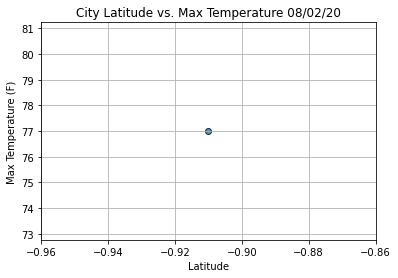

In [44]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

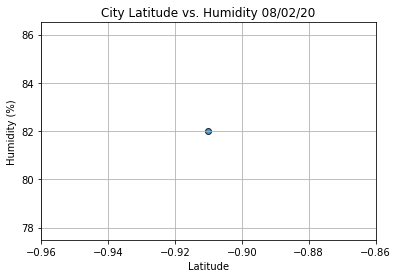

In [45]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

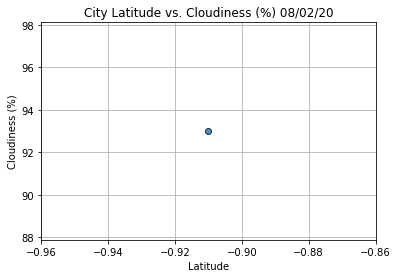

In [46]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

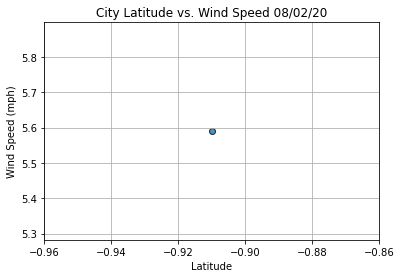

In [47]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [48]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
#def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [49]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
If we run this code there will be no output until we call th

SyntaxError: invalid syntax (<ipython-input-49-e6c74e37027e>, line 20)

In [ ]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

In [ ]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(10,40))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for % Humidity', '% Humidity',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))